# Test esame 2023

Implementare una libreria che gen random number secondo una dist di Cauchy, in intervall simmetrico attorno M, METODO TAC
Parametri di ingresso f_cauchy: M e $\Gamma$ e la semilarghezza dell'intervallo di generazione

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
import random 
from math import ceil, floor


def f_cauchy(M,Gamma):
    return 1/np.pi*Gamma/((M**2+Gamma**2))

###Generate a list of N random number according to the TAC method###
def TAC_range_list(f,xMin: float, xMax: float, yMax: float,N: int,seed: float = 0.)-> list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        x = random.uniform(xMin,xMax)
        y = random.uniform(0,yMax)
        while ( y > f(x) ):
            x = random.uniform(xMin,xMax)
            y = random.uniform(0,yMax)
        randlist.append(x)
    return randlist

def sturges(sample:list)->int:
    return int(np.ceil(1+3.322 * np.log(len(sample))))



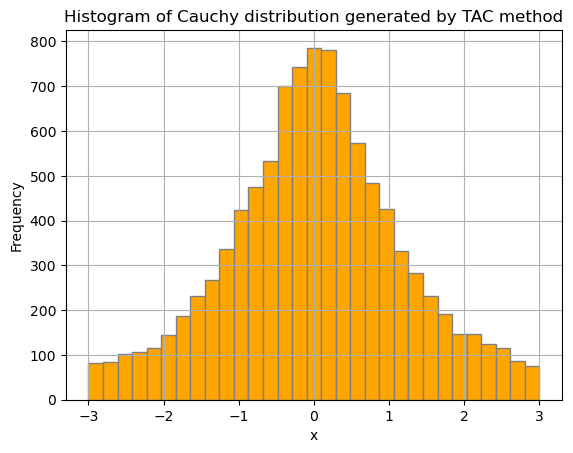

In [44]:
N = 10000
M = 0
Gamma = 1
xMin = M - 3*Gamma
xMax = M + 3*Gamma


sample = TAC_range_list(lambda x: f_cauchy(x,Gamma),xMin,xMax,1,N)
sample = np.array(sample)

N_bins =  sturges(sample)
xMin= floor(min(sample))
xMax= ceil(max(sample))
bin_edges = np.linspace(xMin,xMax,N_bins)

fig, ax = plt.subplots(nrows=1,ncols=1)
plt.hist(sample,bins=bin_edges,color="orange",label="TAC method generated sample",edgecolor="grey")
plt.title("Histogram of Cauchy distribution generated by TAC method")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid()
plt.show()


<>:25: SyntaxWarning: invalid escape sequence '\G'
<>:30: SyntaxWarning: invalid escape sequence '\G'
<>:25: SyntaxWarning: invalid escape sequence '\G'
<>:30: SyntaxWarning: invalid escape sequence '\G'
C:\Users\franc\AppData\Local\Temp\ipykernel_4164\4085407385.py:25: SyntaxWarning: invalid escape sequence '\G'
  axs[0].set_xlabel('$i\Gamma$')
C:\Users\franc\AppData\Local\Temp\ipykernel_4164\4085407385.py:30: SyntaxWarning: invalid escape sequence '\G'
  axs[1].set_xlabel('$i\Gamma$')


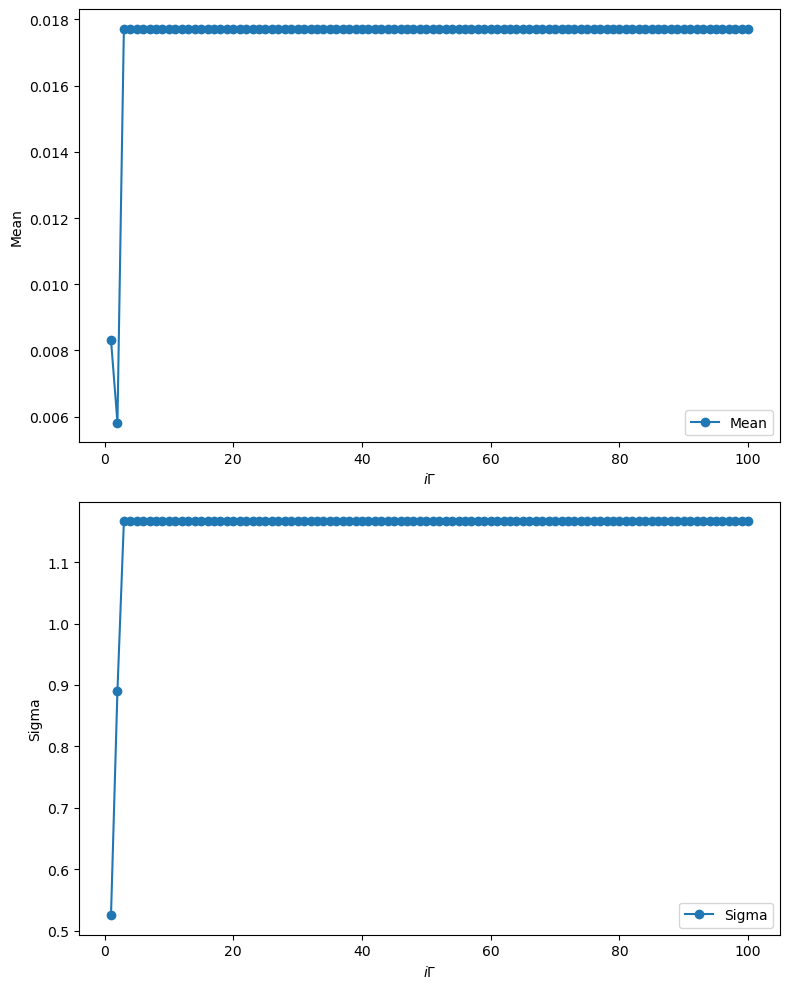

In [49]:
def calculate_mean_sigma(data, M, Gamma):
    iGammas = np.arange(1, 101, dtype=int)
    means = []
    sigmas = []

    for i in iGammas:
        interval_data = data[(data > M - i * Gamma) & (data < M + i * Gamma)]
        means.append(np.mean(interval_data))
        sigmas.append(np.std(interval_data))

    return iGammas, means, sigmas

# Esempio d'uso:
M = 0
Gamma = 1
N = 10000

iGammas, means, sigmas = calculate_mean_sigma(sample, M, Gamma)

# Grafico della media e sigma in funzione di iGamma
def plot_mean_sigma(iGammas, means, sigmas):
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    axs[0].plot(iGammas, means, 'o-', label='Mean')
    axs[0].set_xlabel('$i\Gamma$')
    axs[0].set_ylabel('Mean')
    axs[0].legend()

    axs[1].plot(iGammas, sigmas, 'o-', label='Sigma')
    axs[1].set_xlabel('$i\Gamma$')
    axs[1].set_ylabel('Sigma')
    axs[1].legend()

    plt.tight_layout()
    plt.savefig('mean_sigma.png')
    plt.show()

plot_mean_sigma(iGammas, means, sigmas)


# Altro esame 2023 TEST BONTA' FIT

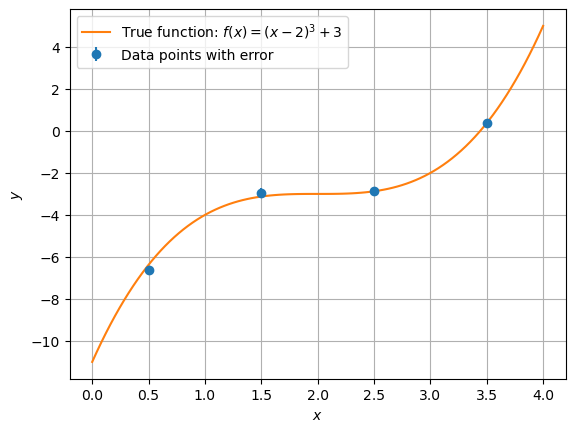

In [55]:
def f(x):
    return (x-2)**3 - 3

x_values = np.array([0.5,1.5,2.5,3.5])
sigma = 0.2
y_values = f(x_values) + np.random.normal(0,sigma,len(x_values))

plt.errorbar(x_values, y_values, yerr=sigma, fmt='o', label='Data points with error')
plt.plot(np.linspace(0, 4, 100), f(np.linspace(0, 4, 100)), label='True function: $f(x) = (x - 2)^3 + 3$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.savefig('data_points.png')
plt.show()


In [60]:
# fit 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2

def model(x,p0,p1):
    return (x-p0)**3 + p1

least_squares = LeastSquares(x_values, y_values, sigma, model)
m = Minuit(least_squares, p0 =2 , p1=3)
m.migrad()
m.hesse()
m.minos()
display(m)

# printing formatted results for checking fit quality Q2,dof,pvalue
for par, val, err in zip(m.parameters, m.values, m.errors):
    print(f'{par} = {val:.3f} ± {err:.3f}') 

print(f'Goodness of the fit: {m.valid}')
print(f'Minuit Q2: {m.fval:.3f}')
print (f'Associated p-value: {1. - chi2.cdf(m.fval, df = m.ndof):.3f}')


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.155 (χ²/ndof = 0.6)      │              Nfcn = 92               │
│ EDM = 2.27e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │   2.037   │   0.034   │   -0.034   │   0.034    │         │         │       │
│ 1 │ p1   │   -2.87   │   0.16    │   -0.16    │    0.16    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          p0           │          p1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.034   │   0.034   │   -0.16   │   0.16    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      p0      p1 │
├────┼─────────────────┤
│ p0 │ 0.00115  0.0043 │
│ p1 │  0.0043  0.0263 │
└────┴─────────────────┘

p0 = 2.037 ± 0.034
p1 = -2.871 ± 0.162
Goodness of the fit: True
Minuit Q2: 1.155
Associated p-value: 0.561


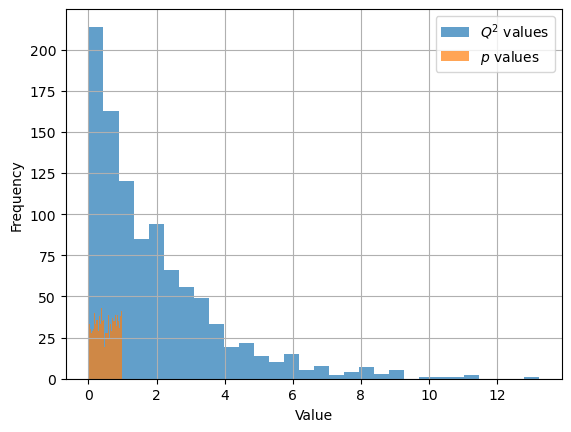

In [64]:
def gen_y(x_values,sigma,p0,p1):
    return model(x_values,p0,p1) + np.random.normal(0,sigma,len(x_values))




N_toys = 1000
Q_2_values = []
p_values = []

for i in range(N_toys):
    y_toy = gen_y(x_values,sigma,2,3)
    lest_squares_toy = LeastSquares(x_values, y_toy, sigma, model)
    m_toy = Minuit(lest_squares_toy, p0 =2 , p1=3)
    m_toy.migrad()
    m_toy.hesse()
    m_toy.minos()
    Q_2_values.append(m_toy.fval)
    p_values.append(1. - chi2.cdf(m_toy.fval, df = m_toy.ndof))


plt.hist(Q_2_values, bins=30, alpha=0.7, label='$Q^2$ values')
plt.hist(p_values, bins=30, alpha=0.7, label='$p$ values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('toy_experiments.png')
plt.show()

# Test 2024

In [71]:
import math

def pdf(x):
    if x < 0 or x > 1.5*np.pi:
        return 0
    else:
        return np.cos(x)**2

In [77]:
###Generate one random number distributed uniformly between given range###
def uniform_range(xMin: float, xMax: float)->float:
    return xMin + random.random() * (xMax-xMin)

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
###Generate a list of N random number distr uniformly between given range###
def uniform_range_list(xMin: float, xMax: float,N: int, seed: float=0.)-> list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        randlist.append(uniform_range(xMin,xMax))
    return randlist

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
#Calc of a definite integral of function f with hit or miss method, f must be positive and continuos in the definite interval###
def HOM_integration (f, xMin: float, xMax: float, yMax: float, N: int=10000, seed: float=0.) ->tuple[float,float]:
    if xMin>xMax:
        raise ValueError('Error: xMin has to be smaller than xMax')
    if xMin == xMax:
        return 0.,0.
    if seed!=0.: 
        random.seed(float(seed))
        
    x_coord = uniform_range_list(xMin,xMax,N)
    y_coord = uniform_range_list(0,yMax,N)
    points_under = 0.
    
    for x,y in zip(x_coord,y_coord):
        if ( f(x) >= y):
            points_under+=1

    area_rett = (xMax-xMin) * yMax
    fraction = float(points_under)/ float (N)
    integral_value = area_rett * fraction
    integral_uncertainty = area_rett**2 * fraction * (1-fraction) / N
    return integral_value, math.sqrt(integral_uncertainty)


risultato,incertezza = HOM_integration(pdf,0,1.5*np.pi,1,10000)
print(f"Risultato: {risultato:.3f} +- {incertezza:.3f}")




def normalized_pdf(x):
    if (0 < x < 1.5*np.pi):
        return (np.cos(x)**2)/risultato
    else:
        return 0
    
    
risultato_normalizzato, incertezza_normalizzata = HOM_integration(normalized_pdf,0,1.5*np.pi,1,10000)
print(f"Risultato normalizzato: {risultato_normalizzato:.3f} +- {incertezza_normalizzata:.3f}")

Risultato: 2.384 +- 0.024
Risultato normalizzato: 0.968 +- 0.019


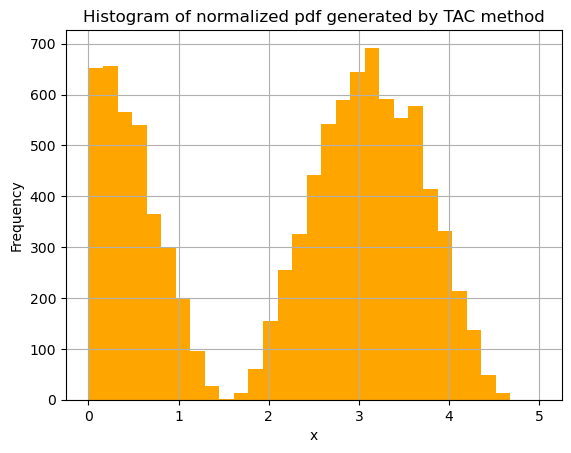

In [80]:
###Generate a list of N random number according to the TAC method###
def TAC_range_list(f,xMin: float, xMax: float, yMax: float,N: int,seed: float = 0.)-> list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        x = random.uniform(xMin,xMax)
        y = random.uniform(0,yMax)
        while ( y > f(x) ):
            x = random.uniform(xMin,xMax)
            y = random.uniform(0,yMax)
        randlist.append(x)
    return randlist


sample = TAC_range_list(normalized_pdf,0,1.5*np.pi,1,10000)

N_bins = sturges(sample)
xMin= floor(min(sample))
xMax= ceil(max(sample))
bin_edges = np.linspace(xMin,xMax,N_bins)

fig, ax = plt.subplots(nrows=1,ncols=1)
plt.hist(sample,bins=bin_edges,color="orange",label="TAC method generated sample")
plt.title("Histogram of normalized pdf generated by TAC method")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid()
plt.show()


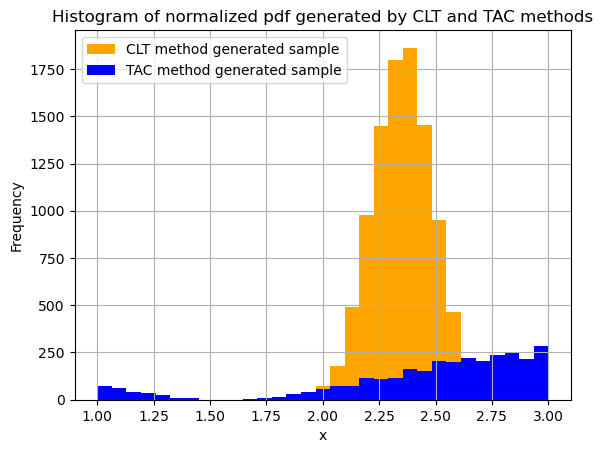

In [87]:
###Generate a list on N number according to CLT on a given interval###

def CLT_range_list(xMin: float, xMax: float,N: int, N_sum: int=100,seed: float=0.) ->list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        randlist.append(CLT_range(xMin,xMax,N_sum))
    return randlist

###Generate a random number according to the CLT on a given interval###
def CLT_range(xMin: float,xMax: float,N_sum: int=100) ->float:
    y = 0.
    for i in range(N_sum):
        y = y+ uniform_range(xMin,xMax)
    y /= N_sum
    return y 



sample_clt = CLT_range_list(0,1.5*np.pi,10000,100)

N_bins = sturges(sample_clt)
xMin= floor(min(sample_clt))
xMax= ceil(max(sample_clt))
bin_edges = np.linspace(xMin,xMax,N_bins)

fig, ax = plt.subplots(nrows=1,ncols=1)
plt.hist(sample_clt,bins=bin_edges,color="orange",label="CLT method generated sample")
plt.hist(sample,bins=bin_edges,color="blue",label="TAC method generated sample")
plt.title("Histogram of normalized pdf generated by CLT and TAC methods")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid()
plt.legend()
plt.show()



In [92]:
# fitting a gaussian to my clt generated sample BINNED
from iminuit import Minuit
from iminuit.cost import BinnedNLL
from scipy.stats import norm, chi2, expon


def model_cdf(bin_edges, mu, sigma):
    return norm.cdf(bin_edges,mu,sigma)

bin_content, bin_edges = np.histogram(sample_clt, bins = N_bins, range=(xMin,xMax))


least_squares = BinnedNLL(bin_content, bin_edges, model_cdf)
m = Minuit(least_squares, mu = 1 , sigma=1)
m.migrad()
m.hesse()
m.minos()
display(m)


for key in m.parameters:
    print(f'{key} = {m.values[key]:.3f} ± {m.errors[key]:.3f}')
    
p_value = 1. - chi2.cdf(m.fval, df = m.ndof)
print(f'Goodness of the fit: {m.valid}')
print(f"p-value: {p_value:.3f}")  
if p_value < 0.05:
    print("The fit is not good")
else:
    print("The fit is good")




┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.75 (χ²/ndof = 0.4)      │              Nfcn = 224              │
│ EDM = 4.35e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.3545   │  0.0014   │  -0.0014   │   0.0014   │         │         │       │
│ 1 │ sigma │ 135.8e-3  │  1.0e-3   │  -1.0e-3   │   1.0e-3   │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0014  │  0.0014   │   -1e-3   │   1e-3    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 1.88e-06       -0 │
│ sigma │       -0 9.55e-07 │
└───────┴───────────────────┘

mu = 2.355 ± 0.001
sigma = 0.136 ± 0.001
Goodness of the fit: True
p-value: 1.000
The fit is good


In [1]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from scipy.stats import norm

x = norm.rvs(size=1000, random_state=1)

def pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Negative unbinned log-likelihood, you can write your own
cost = UnbinnedNLL(x, pdf)

m = Minuit(cost, mu=0, sigma=1)
m.limits["sigma"] = (0, np.inf)
m.migrad()  # find minimum
m.hesse()
m.interactive()

# Test prova su supernovae



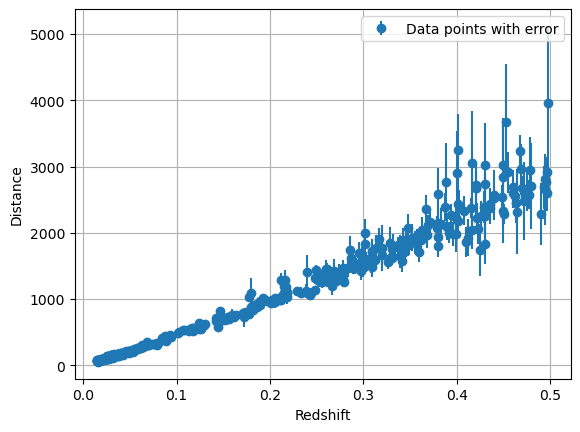

In [4]:
import matplotlib.pyplot as plt
import numpy as np


redshift, dist, dist_err = np.loadtxt("SuperNovae.txt", unpack=True)

plt.errorbar(redshift, dist, yerr=dist_err, fmt='o', label='Data points with error')
plt.xlabel('Redshift')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2


def model (z, H0):
    return (z*3e5)/H0

least_squares = LeastSquares(redshift, dist, dist_err, model)
m = Minuit(least_squares, H0 = 70)
m.migrad()
m.hesse()
m.minos()
display(m)

for par, val, err in zip(m.parameters, m.values, m.errors):
    print(f'{par} = {val:.3f} ± {err:.3f}')

print(f'Goodness of the fit: {m.valid}')
print(f'Minuit Q2: {m.fval:.3f}')
print(f'Associated p-value: {1. - chi2.cdf(m.fval, df = m.ndof):.5f}')
print(f"The Hubble constant is {m.values['H0']:.3f} ± {m.errors['H0']:.3f} km/s/Mpc")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 841.3 (χ²/ndof = 2.1)      │              Nfcn = 27               │
│ EDM = 2.9e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │   63.85   │   0.23    │   -0.23    │    0.23    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          H0           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.23   │   0.23    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬────────┐
│    │     H0 │
├────┼────────┤
│ H0 │ 0.0545 │
└────┴────────┘

H0 = 63.848 ± 0.233
Goodness of the fit: True
Minuit Q2: 841.276
Associated p-value: 0.00000
The Hubble constant is 63.848 ± 0.233 km/s/Mpc


In [12]:
def model_decell(z,H0,q):
    return (3e5/H0)*(z+0.5*(1-q)*z**2)


least_squares = LeastSquares(redshift, dist, dist_err, model_decell)
m2 = Minuit(least_squares, H0 = 70, q = 0)
m2.migrad()
m2.hesse()
m2.minos()
display(m2)
print(f'Goodness of the fit: {m2.valid}')
print(f"The Hubble constant is {m2.values['H0']:.3f} ± {m2.errors['H0']:.3f} km/s/Mpc")
print(f"The deceleration parameter is {m2.values['q']:.3f} ± {m2.errors['q']:.3f}")
print(f'Minuit Q2: {m2.fval:.3f}')


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 368.9 (χ²/ndof = 0.9)      │              Nfcn = 102              │
│ EDM = 6.77e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │   70.3    │    0.4    │    -0.4    │    0.4     │         │         │       │
│ 1 │ q    │   -0.41   │   0.07    │   -0.07    │    0.07    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          H0           │           q           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.4    │    0.4    │   -0.07   │   0.07    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      H0       q │
├────┼─────────────────┤
│ H0 │   0.187  -0.025 │
│  q │  -0.025 0.00511 │
└────┴─────────────────┘

Goodness of the fit: True
The Hubble constant is 70.289 ± 0.432 km/s/Mpc
The deceleration parameter is -0.407 ± 0.071
Minuit Q2: 368.856


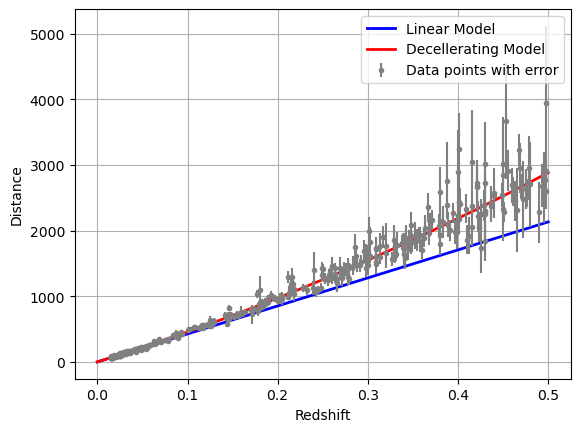

Valore medio densità dell'universo, Omega: 104.434 ± 0.648


In [23]:
x_coord1 = np.linspace(0,0.5,1000)
y_coord1 = model(x_coord1,m.values['H0'])

x_coord2 = np.linspace(0,0.5,1000)
y_coord2 = model_decell(x_coord2,m2.values['H0'],m2.values['q'])

plt.plot(x_coord1, y_coord1, label='Linear Model', linewidth=2, color='blue')
plt.plot(x_coord2,y_coord2,label='Decellerating Model',linewidth=2,color='red')
plt.errorbar(redshift, dist, yerr=dist_err, fmt='.', label='Data points with error',color="grey")
plt.xlabel('Redshift')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()



print(f"Valore medio densità dell'universo, Omega: {(3*(m2.values['H0'])/2)-1:.3f} ± {3*(m2.errors['H0'])/2:.3f}")

In [25]:
import random

# Generate a list of 20 random indices
random_indices = random.sample(range(len(dist)), 30)

# Create a subset of the data based on the random indices
subset_dist = dist[random_indices]
subset_dist_err = dist_err[random_indices]
subset_redshift = redshift[random_indices]

# Fit the model 2 on the subset data
least_squares_subset = LeastSquares(subset_redshift, subset_dist, subset_dist_err, model_decell)
m_subset = Minuit(least_squares_subset, H0=70, q=0)
m_subset.migrad()
m_subset.hesse()
m_subset.minos()
display(m_subset)

for par, val, err in zip(m_subset.parameters, m_subset.values, m_subset.errors):
    print(f'{par} = {val:.3f} ± {err:.3f}')

print(f'Goodness of the fit: {m_subset.valid}')
print(f"The Hubble constant is {m_subset.values['H0']:.3f} ± {m_subset.errors['H0']:.3f} km/s/Mpc")
print(f"The deceleration parameter is {m_subset.values['q']:.3f} ± {m_subset.errors['q']:.3f}")
print(f'Minuit Q2: {m_subset.fval:.3f}')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.68 (χ²/ndof = 0.6)      │              Nfcn = 109              │
│ EDM = 5.55e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │   71.6    │    1.5    │    -1.5    │    1.6     │         │         │       │
│ 1 │ q    │   -0.70   │   0.34    │   -0.35    │    0.34    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          H0           │           q           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -1.5    │    1.6    │   -0.35   │   0.34    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────┐
│    │    H0     q │
├────┼─────────────┤
│ H0 │  2.38 -0.41 │
│  q │ -0.41 0.117 │
└────┴─────────────┘

H0 = 71.569 ± 1.544
q = -0.705 ± 0.343
Goodness of the fit: True
The Hubble constant is 71.569 ± 1.544 km/s/Mpc
The deceleration parameter is -0.705 ± 0.343
Minuit Q2: 17.683


C:\Users\franc\AppData\Local\Temp\ipykernel_9808\1865808860.py:25: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_pmf = [np.math.comb(n,k)*p**k*(1-p)**(n-k) for k in range(n+1)]


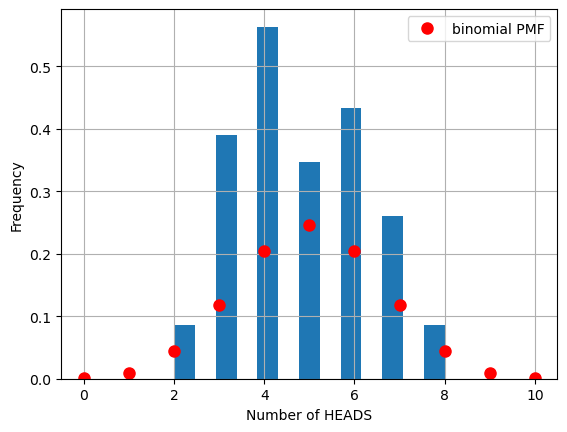

In [35]:
from math import floor ,ceil 
from random import random 


def sturges(sample:list)->int:
    return int(np.ceil(1+3.322 * np.log(len(sample))))
n = 10
p = 0.5
N_toy = 50

risultati = np.random.binomial(n,p,N_toy)

N_bins = sturges(risultati)
xMin = floor(min(risultati))
xMax = ceil(max(risultati))
bin_edges = np.linspace(xMin,xMax,N_bins)


plt.hist(risultati,bins=bin_edges,density=True)
plt.xlabel("Number of HEADS")
plt.ylabel("Frequency")
plt.grid()


binomial_pmf = [np.math.comb(n,k)*p**k*(1-p)**(n-k) for k in range(n+1)]
plt.plot(range(n+1), binomial_pmf,"ro", markersize=8, label="binomial PMF")
plt.legend()
plt.show()




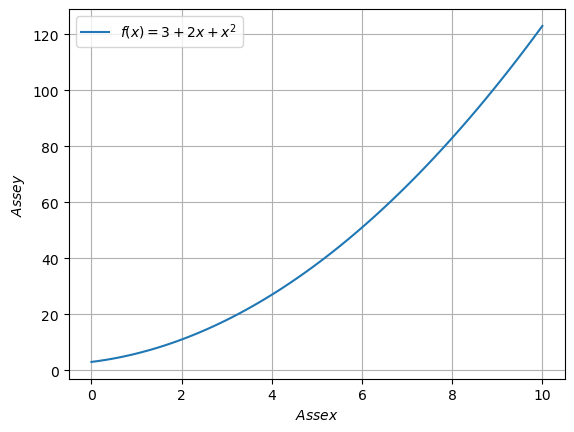

In [40]:
# test bontà fit seconda prova 2024

import numpy as np
import matplotlib.pyplot as plt
from random import random

def func(x, a, b, c):
    return a + b*x + c*(x**2)

a = 3
b = 2
c = 1

x_coord = np.linspace(0,10,100)
y_coord = np.zeros(len(x_coord))
for i in range(len(x_coord)):
    y_coord[i] = func(x_coord[i],a,b,c)
    
    
plt.plot(x_coord, y_coord, label='$f(x) = 3 + 2x + x^2$')
plt.xlabel('$Asse x$')
plt.ylabel('$Asse y$')
plt.legend()
plt.grid(True)
plt.show()
    

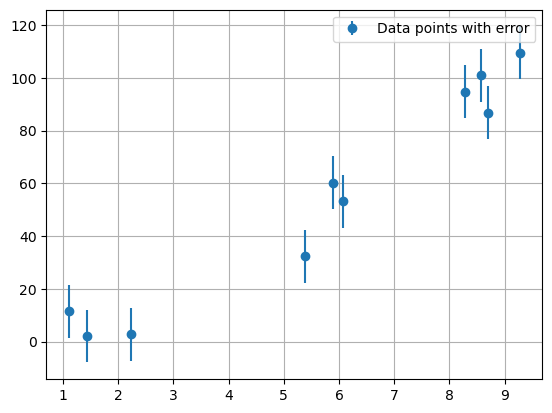

In [47]:
import random 

###Generate one random number distributed uniformly between given range###
def uniform_range(xMin: float, xMax: float)->float:
    return xMin + random.random() * (xMax-xMin)

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
###Generate a list of N random number distr uniformly between given range###
def uniform_range_list(xMin: float, xMax: float,N: int, seed: float=0.)-> list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        randlist.append(uniform_range(xMin,xMax))
    return randlist



x_coord1 = uniform_range_list(0,10,10)
x_coord1.sort()
y_coord1 = np.zeros(len(x_coord1))
for i in range(len(x_coord1)):
    y_coord1[i]= func(x_coord1[i],a,b,c) + np.random.normal(0,10)
    
plt.errorbar(x_coord1, y_coord1, yerr=10, fmt='o', label='Data points with error')
plt.grid()
plt.legend()
plt.show()
    

In [48]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2

least_squares = LeastSquares(x_coord1,y_coord1,10,func)
m = Minuit(least_squares, a = 3, b = 2, c = 1)
m.migrad()
m.hesse()
m.minos()
display(m)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.262 (χ²/ndof = 0.8)      │              Nfcn = 227              │
│ EDM = 0.000118 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    -0     │    11     │    -11     │     11     │         │         │       │
│ 1 │ b    │     2     │     5     │     -5     │     5      │         │         │       │
│ 2 │ c    │    1.0    │    0.5    │    -0.5    │    0.5     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -11    │    11     │    -5     │     5     │   -0.5    │    0.5    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │     a     b     c │
├───┼───────────────────┤
│ a │   123   -52  4.48 │
│ b │   -52  28.7 -2.69 │
│ c │  4.48 -2.69 0.263 │
└───┴───────────────────┘

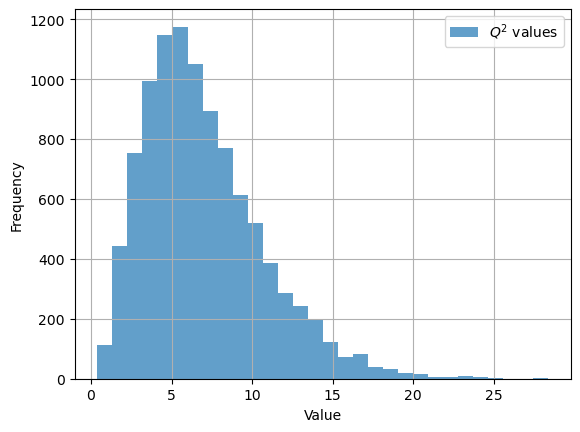

In [50]:
N_toys = 10000

Q_2_values = []

for i in range(N_toys):
    x_coord = uniform_range_list(0,10,10)
    x_coord.sort()
    y_coord = np.zeros(len(x_coord))
    for i in range(len(x_coord)):
        y_coord[i]= func(x_coord[i],a,b,c) + np.random.normal(0,10)
    least_squares = LeastSquares(x_coord,y_coord,10,func)
    m = Minuit(least_squares, a = 3, b = 2, c = 1)
    m.migrad()
    Q_2_values.append(m.fval)

plt.hist(Q_2_values, bins=30, alpha=0.7, label='$Q^2$ values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


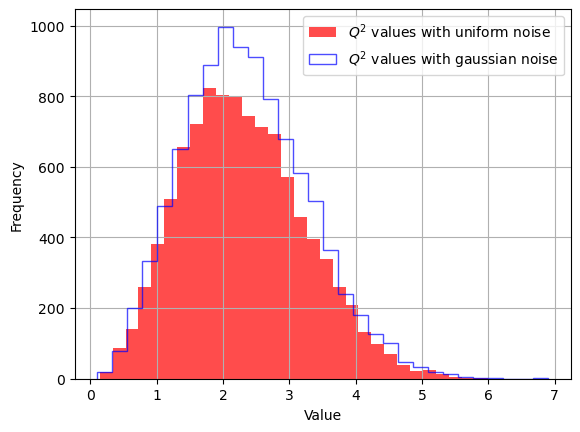

In [57]:
N_toys = 10000

Q_2_values2 = []

for i in range(N_toys):
    x_coord = uniform_range_list(0,10,10)
    x_coord.sort()
    y_coord = np.zeros(len(x_coord))
    for i in range(len(x_coord)):
        y_coord[i]= func(x_coord[i],a,b,c) + np.random.uniform(-10, 10)
    least_squares = LeastSquares(x_coord,y_coord,10,func)
    m = Minuit(least_squares, a = 3, b = 2, c = 1)
    m.migrad()
    Q_2_values2.append(m.fval)

plt.hist(Q_2_values2, bins=30, alpha=0.7, label='$Q^2$ values with uniform noise',color="red")
plt.hist(Q_2_values, bins=30, alpha=0.7, label='$Q^2$ values with gaussian noise',color="blue", histtype="step")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


La soglia è 3.5742633947756515


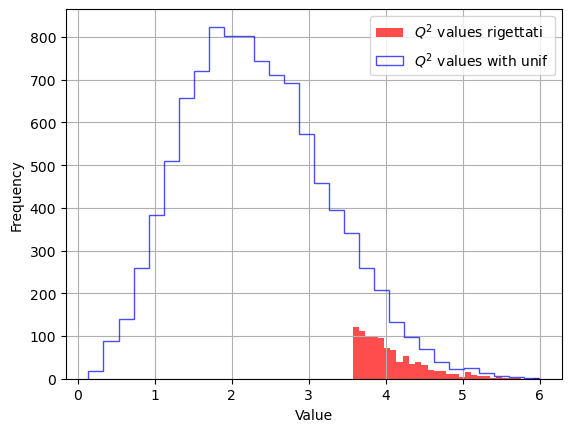

In [59]:
from math import ceil,floor

N_soglia = floor(N_toys*0.9)
Q_2_values2.sort()
print(f"La soglia è {Q_2_values2[N_soglia]}")

Q_2_values2_rigettati = [x for x in Q_2_values2 if x > Q_2_values2[N_soglia]]

plt.hist(Q_2_values2_rigettati, bins=30, alpha=0.7, label='$Q^2$ values rigettati',color="red")
plt.hist(Q_2_values2, bins=30, alpha=0.7, label='$Q^2$ values with unif',color="blue", histtype="step")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


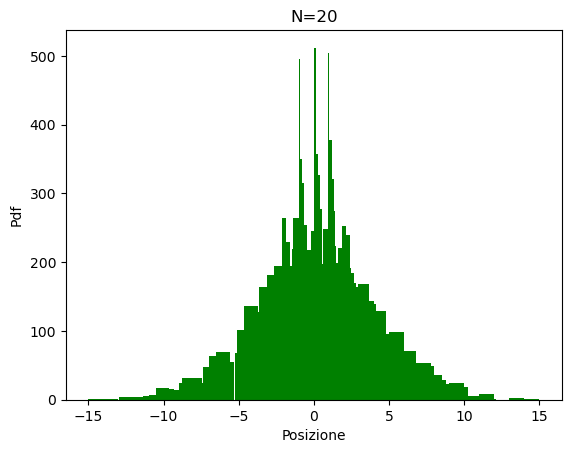

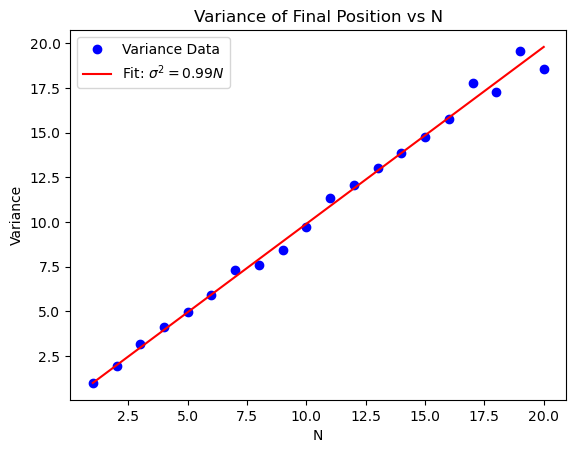

Fitted parameter a: 0.99


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

N_levels = 20
k = 1000

def random_walk(N,k):
    steps = np.random.choice([-1,1], size=(k,N))
    pos = np.cumsum(steps,axis=1)
    final_pos = pos[: , -1]
    return final_pos

variances = []

for N in range(1,N_levels+1):
    final_pos = random_walk(N,k)
    variances.append(np.var(final_pos))
    
    plt.hist(final_pos,bins=30,color="g")
    plt.title(f"N={N}")
    plt.xlabel("Posizione")
    plt.ylabel("Pdf")

plt.show

# Plot variance as a function of N
plt.figure()
N_values = np.arange(1, N_levels + 1)
plt.plot(N_values, variances, 'bo', label='Variance Data')

# Fit the variance data to a theoretical model
def variance_model(N, a):
    return a * N

params, _ = curve_fit(variance_model, N_values, variances)
a_fit = params[0]
plt.plot(N_values, variance_model(N_values, a_fit), 'r-', label=f'Fit: $\\sigma^2 = {a_fit:.2f}N$')

plt.xlabel('N')
plt.ylabel('Variance')
plt.title('Variance of Final Position vs N')
plt.legend()
plt.show()

print(f"Fitted parameter a: {a_fit:.2f}")
